# Fetch random image from the test set and find its best match from the train set

### Necessary imports

In [1]:
import pickle
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from utils import load_dataset, get_img_features, get_best_match

### Load SIFT features dataset

In [2]:
SIFT_features = load_dataset('SIFT_features')

### Pick an image from the test set randomly

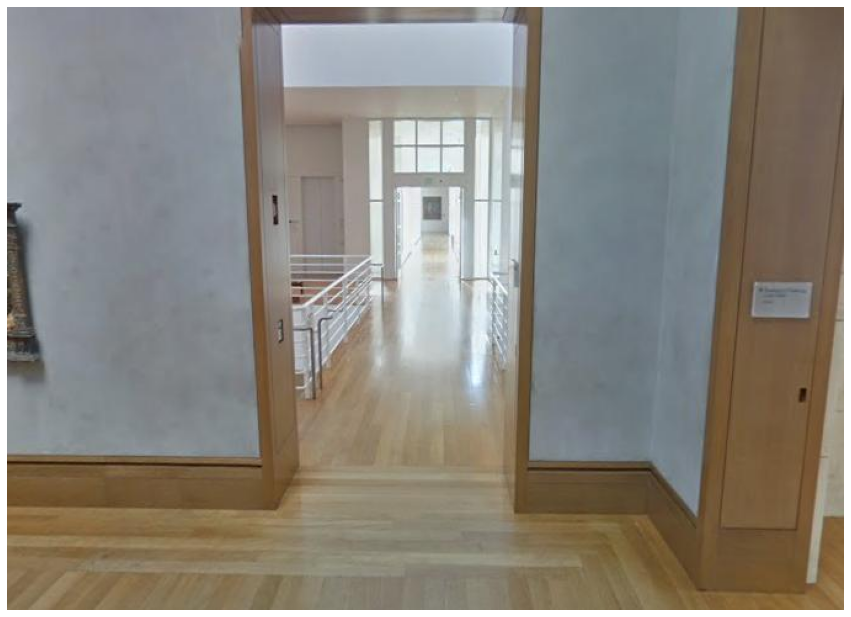

In [34]:
# Get list of all images
img_paths = glob.glob('./Dataset/test/*')

# Pick an image randomly
i = np.random.randint(0, len(img_paths))
img_path = img_paths[i]

# Load image
img = cv.cvtColor(cv.imread(img_path), cv.COLOR_RGB2BGR)

# Plot
plt.subplots(figsize = (15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

### Look for best SIFT match in train images

In [ ]:
best_img_name, good_matches, [kp_query, kp_match] = get_best_match(img, SIFT_features)

# DO SOMETHING IF NO GOOD MATCHES ARE FOUND (WALL IMAGES)

Image 1 of 7500. Best match so far: 0 points.
Image 2 of 7500. Best match so far: 8 points.
Image 3 of 7500. Best match so far: 8 points.
Image 4 of 7500. Best match so far: 8 points.
Image 5 of 7500. Best match so far: 8 points.
Image 6 of 7500. Best match so far: 8 points.
Image 7 of 7500. Best match so far: 8 points.
Image 8 of 7500. Best match so far: 8 points.
Image 9 of 7500. Best match so far: 8 points.
Image 10 of 7500. Best match so far: 8 points.
Image 11 of 7500. Best match so far: 8 points.
Image 12 of 7500. Best match so far: 8 points.
Image 13 of 7500. Best match so far: 8 points.
Image 14 of 7500. Best match so far: 8 points.
Image 15 of 7500. Best match so far: 8 points.
Image 16 of 7500. Best match so far: 8 points.
Image 17 of 7500. Best match so far: 11 points.
Image 18 of 7500. Best match so far: 11 points.
Image 19 of 7500. Best match so far: 11 points.
Image 20 of 7500. Best match so far: 11 points.
Image 21 of 7500. Best match so far: 11 points.
Image 22 of 7500.

Image 175 of 7500. Best match so far: 42 points.
Image 176 of 7500. Best match so far: 42 points.
Image 177 of 7500. Best match so far: 42 points.
Image 178 of 7500. Best match so far: 42 points.
Image 179 of 7500. Best match so far: 42 points.
Image 180 of 7500. Best match so far: 42 points.
Image 181 of 7500. Best match so far: 42 points.
Image 182 of 7500. Best match so far: 42 points.
Image 183 of 7500. Best match so far: 42 points.
Image 184 of 7500. Best match so far: 42 points.
Image 185 of 7500. Best match so far: 42 points.
Image 186 of 7500. Best match so far: 42 points.
Image 187 of 7500. Best match so far: 42 points.
Image 188 of 7500. Best match so far: 42 points.
Image 189 of 7500. Best match so far: 42 points.
Image 190 of 7500. Best match so far: 42 points.
Image 191 of 7500. Best match so far: 42 points.
Image 192 of 7500. Best match so far: 42 points.
Image 193 of 7500. Best match so far: 42 points.
Image 194 of 7500. Best match so far: 42 points.
Image 195 of 7500. B

Image 355 of 7500. Best match so far: 42 points.
Image 356 of 7500. Best match so far: 42 points.
Image 357 of 7500. Best match so far: 42 points.
Image 358 of 7500. Best match so far: 42 points.
Image 359 of 7500. Best match so far: 42 points.
Image 360 of 7500. Best match so far: 42 points.
Image 361 of 7500. Best match so far: 42 points.
Image 362 of 7500. Best match so far: 42 points.
Image 363 of 7500. Best match so far: 42 points.
Image 364 of 7500. Best match so far: 42 points.
Image 365 of 7500. Best match so far: 42 points.
Image 366 of 7500. Best match so far: 42 points.
Image 367 of 7500. Best match so far: 42 points.
Image 368 of 7500. Best match so far: 42 points.
Image 369 of 7500. Best match so far: 42 points.
Image 370 of 7500. Best match so far: 42 points.
Image 371 of 7500. Best match so far: 42 points.
Image 372 of 7500. Best match so far: 42 points.
Image 373 of 7500. Best match so far: 42 points.
Image 374 of 7500. Best match so far: 42 points.
Image 375 of 7500. B

Image 535 of 7500. Best match so far: 42 points.
Image 536 of 7500. Best match so far: 42 points.
Image 537 of 7500. Best match so far: 42 points.
Image 538 of 7500. Best match so far: 42 points.
Image 539 of 7500. Best match so far: 42 points.
Image 540 of 7500. Best match so far: 42 points.
Image 541 of 7500. Best match so far: 42 points.
Image 542 of 7500. Best match so far: 42 points.
Image 543 of 7500. Best match so far: 42 points.
Image 544 of 7500. Best match so far: 42 points.
Image 545 of 7500. Best match so far: 42 points.
Image 546 of 7500. Best match so far: 42 points.
Image 547 of 7500. Best match so far: 42 points.
Image 548 of 7500. Best match so far: 42 points.
Image 549 of 7500. Best match so far: 42 points.
Image 550 of 7500. Best match so far: 42 points.
Image 551 of 7500. Best match so far: 42 points.
Image 552 of 7500. Best match so far: 42 points.
Image 553 of 7500. Best match so far: 42 points.
Image 554 of 7500. Best match so far: 42 points.
Image 555 of 7500. B

Image 710 of 7500. Best match so far: 42 points.
Image 711 of 7500. Best match so far: 42 points.
Image 712 of 7500. Best match so far: 42 points.
Image 713 of 7500. Best match so far: 42 points.
Image 714 of 7500. Best match so far: 42 points.
Image 715 of 7500. Best match so far: 42 points.
Image 716 of 7500. Best match so far: 42 points.
Image 717 of 7500. Best match so far: 42 points.
Image 718 of 7500. Best match so far: 42 points.
Image 719 of 7500. Best match so far: 42 points.
Image 720 of 7500. Best match so far: 42 points.
Image 721 of 7500. Best match so far: 42 points.
Image 722 of 7500. Best match so far: 42 points.
Image 723 of 7500. Best match so far: 42 points.
Image 724 of 7500. Best match so far: 42 points.
Image 725 of 7500. Best match so far: 42 points.
Image 726 of 7500. Best match so far: 42 points.
Image 727 of 7500. Best match so far: 42 points.
Image 728 of 7500. Best match so far: 42 points.
Image 729 of 7500. Best match so far: 42 points.
Image 730 of 7500. B

Image 880 of 7500. Best match so far: 42 points.
Image 881 of 7500. Best match so far: 42 points.
Image 882 of 7500. Best match so far: 42 points.
Image 883 of 7500. Best match so far: 42 points.
Image 884 of 7500. Best match so far: 42 points.
Image 885 of 7500. Best match so far: 42 points.
Image 886 of 7500. Best match so far: 42 points.
Image 887 of 7500. Best match so far: 42 points.
Image 888 of 7500. Best match so far: 42 points.
Image 889 of 7500. Best match so far: 42 points.
Image 890 of 7500. Best match so far: 42 points.
Image 891 of 7500. Best match so far: 42 points.
Image 892 of 7500. Best match so far: 42 points.
Image 893 of 7500. Best match so far: 42 points.
Image 894 of 7500. Best match so far: 42 points.
Image 895 of 7500. Best match so far: 42 points.
Image 896 of 7500. Best match so far: 42 points.
Image 897 of 7500. Best match so far: 42 points.
Image 898 of 7500. Best match so far: 42 points.
Image 899 of 7500. Best match so far: 42 points.
Image 900 of 7500. B

Image 1050 of 7500. Best match so far: 42 points.
Image 1051 of 7500. Best match so far: 42 points.
Image 1052 of 7500. Best match so far: 42 points.
Image 1053 of 7500. Best match so far: 42 points.
Image 1054 of 7500. Best match so far: 42 points.
Image 1055 of 7500. Best match so far: 42 points.
Image 1056 of 7500. Best match so far: 42 points.
Image 1057 of 7500. Best match so far: 42 points.
Image 1058 of 7500. Best match so far: 42 points.
Image 1059 of 7500. Best match so far: 42 points.
Image 1060 of 7500. Best match so far: 42 points.
Image 1061 of 7500. Best match so far: 42 points.
Image 1062 of 7500. Best match so far: 42 points.
Image 1063 of 7500. Best match so far: 42 points.
Image 1064 of 7500. Best match so far: 42 points.
Image 1065 of 7500. Best match so far: 42 points.
Image 1066 of 7500. Best match so far: 42 points.
Image 1067 of 7500. Best match so far: 42 points.
Image 1068 of 7500. Best match so far: 42 points.
Image 1069 of 7500. Best match so far: 42 points.


Image 1216 of 7500. Best match so far: 42 points.
Image 1217 of 7500. Best match so far: 42 points.
Image 1218 of 7500. Best match so far: 42 points.
Image 1219 of 7500. Best match so far: 42 points.
Image 1220 of 7500. Best match so far: 42 points.
Image 1221 of 7500. Best match so far: 42 points.
Image 1222 of 7500. Best match so far: 42 points.
Image 1223 of 7500. Best match so far: 42 points.
Image 1224 of 7500. Best match so far: 42 points.
Image 1225 of 7500. Best match so far: 42 points.
Image 1226 of 7500. Best match so far: 42 points.
Image 1227 of 7500. Best match so far: 42 points.
Image 1228 of 7500. Best match so far: 42 points.
Image 1229 of 7500. Best match so far: 42 points.
Image 1230 of 7500. Best match so far: 42 points.
Image 1231 of 7500. Best match so far: 42 points.
Image 1232 of 7500. Best match so far: 42 points.
Image 1233 of 7500. Best match so far: 42 points.
Image 1234 of 7500. Best match so far: 42 points.
Image 1235 of 7500. Best match so far: 42 points.


Image 1385 of 7500. Best match so far: 42 points.
Image 1386 of 7500. Best match so far: 42 points.
Image 1387 of 7500. Best match so far: 42 points.
Image 1388 of 7500. Best match so far: 42 points.
Image 1389 of 7500. Best match so far: 42 points.
Image 1390 of 7500. Best match so far: 42 points.
Image 1391 of 7500. Best match so far: 42 points.
Image 1392 of 7500. Best match so far: 42 points.
Image 1393 of 7500. Best match so far: 42 points.
Image 1394 of 7500. Best match so far: 42 points.
Image 1395 of 7500. Best match so far: 42 points.
Image 1396 of 7500. Best match so far: 42 points.
Image 1397 of 7500. Best match so far: 42 points.
Image 1398 of 7500. Best match so far: 42 points.
Image 1399 of 7500. Best match so far: 42 points.
Image 1400 of 7500. Best match so far: 42 points.
Image 1401 of 7500. Best match so far: 42 points.
Image 1402 of 7500. Best match so far: 42 points.
Image 1403 of 7500. Best match so far: 42 points.
Image 1404 of 7500. Best match so far: 42 points.


Image 1550 of 7500. Best match so far: 52 points.
Image 1551 of 7500. Best match so far: 52 points.
Image 1552 of 7500. Best match so far: 52 points.
Image 1553 of 7500. Best match so far: 52 points.
Image 1554 of 7500. Best match so far: 52 points.
Image 1555 of 7500. Best match so far: 52 points.
Image 1556 of 7500. Best match so far: 52 points.
Image 1557 of 7500. Best match so far: 52 points.
Image 1558 of 7500. Best match so far: 52 points.
Image 1559 of 7500. Best match so far: 52 points.
Image 1560 of 7500. Best match so far: 52 points.
Image 1561 of 7500. Best match so far: 52 points.
Image 1562 of 7500. Best match so far: 52 points.
Image 1563 of 7500. Best match so far: 52 points.
Image 1564 of 7500. Best match so far: 52 points.
Image 1565 of 7500. Best match so far: 52 points.
Image 1566 of 7500. Best match so far: 52 points.
Image 1567 of 7500. Best match so far: 52 points.
Image 1568 of 7500. Best match so far: 52 points.
Image 1569 of 7500. Best match so far: 52 points.


### Show result and matches

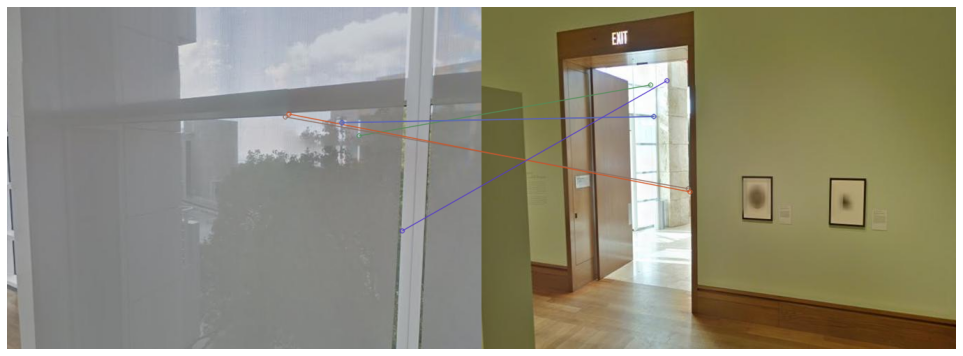

In [33]:
# Load best match image and matches
best_match_img = cv.cvtColor(cv.imread('./Dataset/train/' + best_img_name + '.jpg'), cv.COLOR_RGB2BGR)

# Get matching points for both images
pts_query = np.float32([kp_query[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
pts_match = np.float32([kp_match[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Get transformation matrix and list of succesful matches
H, status = cv.findHomography(pts_query, pts_match, cv.RANSAC, ransacReprojThreshold = 5, maxIters = 10)
success = status.ravel().tolist()
draw_params = dict(matchesMask = success, flags = 2)

# Draw matches between both images
matches_img = cv.drawMatches(img, kp_query, best_match_img, kp_match, good_matches, None, **draw_params)

# Plot
plt.subplots(figsize = (17, 17))
plt.imshow(matches_img)
plt.axis('off')
plt.show()